## **Definições iniciais**

In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
dt = 0.05
tf = 50
t = np.arange(0, tf, dt)

J = 0.01 #kgm²
b = 0.019 #Nms
Ke = 0.01 #V/rad/s
Kt = 0.01 #Nm/Amp
R = 1 #Ohm
L = 0.5 #H

v = 5 #V

## **Questão 1**

### [ a ]

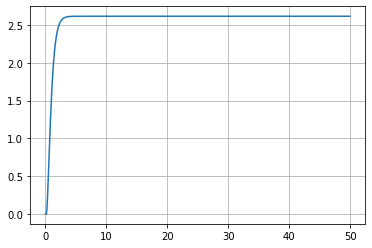

In [47]:
i = np.zeros(np.size(t))
i_p = np.zeros(np.size(t))
theta_p = np.zeros(np.size(t))
theta_pp = np.zeros(np.size(t))

for k in range(0, np.size(t)-1):
    theta_pp[k+1] = (1/J) * (Kt*i[k] - b*theta_p[k])
    theta_p[k+1]  = theta_p[k] + theta_pp[k]*dt
    i_p[k+1]      = (1/L)*(v - R*i[k] - Ke*theta_p[k])
    i [k+1]       = i[k] + i_p[k]*dt

plt.plot(t, theta_p)
plt.grid()

### [ b ]

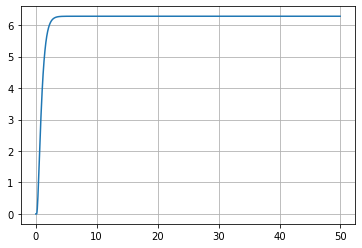

In [48]:
v_max = 12 #alteracao da tensao para a maxima para analisar a velocidade angular

i = np.zeros(np.size(t))
i_p = np.zeros(np.size(t))
theta_p = np.zeros(np.size(t))
theta_pp = np.zeros(np.size(t))

for k in range(0, np.size(t)-1):
    theta_pp[k+1] = (1/J) * (Kt*i[k] - b*theta_p[k])
    theta_p[k+1]  = theta_p[k] + theta_pp[k]*dt
    i_p[k+1]      = (1/L)*(v_max - R*i[k] - Ke*theta_p[k])
    i [k+1]       = i[k] + i_p[k]*dt

plt.plot(t, theta_p)
plt.grid()

### Perguntas

#### [ i ]

In [49]:
#valor gerado com v_max = 12

theta_p[500]/np.pi # 1.94 pi (rad/s)

1.9998526880657008

Não, a velocidade máxima dele é de cerca de 2 $\pi$ rad/s.

## **Questão 2**

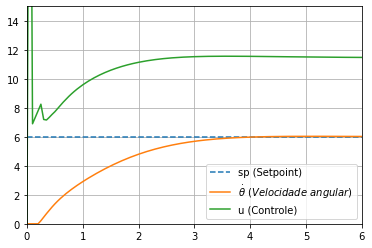

In [50]:
Kp = 1
Ki = 1.5
Kd = 0.3

sp = 6*np.ones(np.size(t))
u = np.zeros(np.size(t))

erro = 0
erro_old = 0
erro_i = 0

theta_p = np.zeros(np.size(t))
theta_pp = np.zeros(np.size(t))
i = np.zeros(np.size(t))
i_p = np.zeros(np.size(t))

for k in range(0, np.size(t)-1):

    theta_pp[k+1] = (1/J) * (Kt*i[k] - b*theta_p[k])
    theta_p[k+1]  = theta_p[k] + theta_pp[k]*dt
    #ação de controle u[k] aplicada como a tensão V para
    #estabilizar a velocidade no setpoint
    i_p[k+1]      = (1/L)*(u[k] - R*i[k] - Ke*theta_p[k])
    i [k+1]       = i[k] + i_p[k]*dt

    erro = sp[k] - theta_p[k]
    erro_d = (erro - erro_old)/dt
    erro_i = erro_i + erro*dt
    erro_old = erro

    u[k+1] = Kp*erro + Ki*erro_i + Kd*erro_d
    
    
plt.plot(t, sp, '--', label='sp (Setpoint)')
plt.plot(t, theta_p, '-', label = '$\dot{\\theta} \,\, (Velocidade \,\,  angular)$')
plt.plot(t, u, '-', label = 'u (Controle)')
plt.xlim([0, 6])
plt.ylim([0, 15])
plt.legend()
plt.grid()

### Perguntas

#### [ i ]

Não, ela demora cerca de 4 segundos para atingir o setpoint (4).

#### [ ii ]

Cerca de 4 segundos.

#### [ iii ]

Acionamento com PWM variável acionando uma ponte h que direciona a tensão para o motor.

## **Questão 3**

### [ a ]

In [51]:
u = 0.1 #m/s
w = 0 #rad/s
R2 = 0.035 #m
L2 = 0.28 #m

wd = (2*u + w*L2)/(2*R2)
we = (2*u - w*L2)/(2*R2)

print(" Wd: %.2f rad/s \n We: %.2f rad/s" % (wd, we))

 Wd: 2.86 rad/s 
 We: 2.86 rad/s


### [ b ]

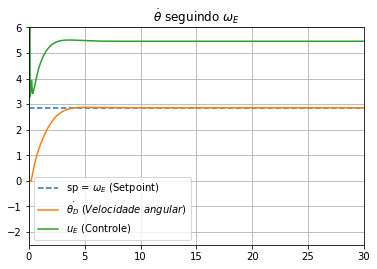

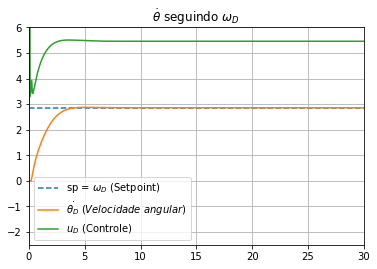

In [52]:
Kp_E = 1
Ki_E = 1.5
Kd_E = 0.3

Kp_D = 1
Ki_D = 1.5
Kd_D = 0.3

u_E = np.zeros(np.size(t))
u_D = np.zeros(np.size(t))

we = ((2*u + w*L2)/(2*R2))*np.ones(np.size(t))
wd = ((2*u - w*L2)/(2*R2))*np.ones(np.size(t))

erro_E = 0
erro_old_E = 0
erro_i_E = 0

erro_D = 0
erro_old_D = 0
erro_i_D = 0

theta_p_E = np.zeros(np.size(t))
theta_pp_E = np.zeros(np.size(t))
i_E = np.zeros(np.size(t))
i_p_E = np.zeros(np.size(t))

theta_p_D = np.zeros(np.size(t))
theta_pp_D = np.zeros(np.size(t))
i_D = np.zeros(np.size(t))
i_p_D = np.zeros(np.size(t))

for k in range(0, np.size(t)-1):
    #ESQUERDO

    theta_pp_E[k+1] = (1/J) * (Kt*i_E[k] - b*theta_p_E[k])
    theta_p_E[k+1]  = theta_p_E[k] + theta_pp_E[k]*dt
    #ação de controle u[k] aplicada como a tensão V para
    #estabilizar a velocidade no setpoint
    i_p_E[k+1]      = (1/L)*(u_E[k] - R*i_E[k] - Ke*theta_p_E[k])
    i_E[k+1]       = i_E[k] + i_p_E[k]*dt

    erro_E = we[k] - theta_p_E[k]
    erro_d_E = (erro_E - erro_old_E)/dt
    erro_i_E = erro_i_E + erro_E*dt
    erro_old_E = erro_E

    u_E[k+1] = Kp_E*erro_E + Ki_E*erro_i_E + Kd_E*erro_d_E

    #DIREITO

    theta_pp_D[k+1] = (1/J) * (Kt*i_D[k] - b*theta_p_D[k])
    theta_p_D[k+1]  = theta_p_D[k] + theta_pp_D[k]*dt
    #ação de controle u[k] aplicada como a tensão V para
    #estabilizar a velocidade no setpoint
    i_p_D[k+1]      = (1/L)*(u_D[k] - R*i_D[k] - Ke*theta_p_D[k])
    i_D[k+1]       = i_D[k] + i_p_D[k]*dt

    erro_D = wd[k] - theta_p_D[k]
    erro_d_D = (erro_D - erro_old_D)/dt
    erro_i_D = erro_i_D + erro_D*dt
    erro_old_D = erro_D

    u_D[k+1] = Kp_D*erro_D + Ki_D*erro_i_D + Kd_D*erro_d_D

plt.figure(1)
plt.plot(t, we, '--', label='sp = $\omega_E$ (Setpoint)')
plt.plot(t, theta_p_E, '-', label = '$\dot{\\theta_D} \,\, (Velocidade \,\, angular)$')
plt.plot(t, u_E, '-', label = '$u_E$ (Controle)')
plt.xlim([0, 30])
plt.ylim([-2.5, 6])
plt.legend()
plt.title("$\dot{\\theta}$ seguindo $\omega_E$")
plt.grid()

plt.figure(2)
plt.plot(t, wd, '--', label='sp = $\omega_D$ (Setpoint)')
plt.plot(t, theta_p_D, '-', label = '$\dot{\\theta_D} \,\, (Velocidade \,\, angular)$')
plt.plot(t, u_D, '-', label = '$u_D$ (Controle)')
plt.xlim([0, 30])
plt.ylim([-2.5, 6])
plt.legend()
plt.title("$\dot{\\theta}$ seguindo $\omega_D$")
plt.grid()

### [ c ]

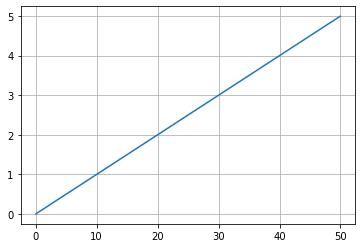

In [53]:
u = 0.1
x = np.zeros(np.size(t))

for k in range(0, np.size(t)-1):
    x[k+1] = x[k] + u*dt

plt.plot(t, x)
plt.grid()

O avanço da posição seria obtido pela integral da aceleração $\dot{x}$, uma resposta linear e instantânea (por esse método).

### [ d ]

A coordenada x será dependente do tempo, em t = 100s x(t) -> x(100) = 0.37


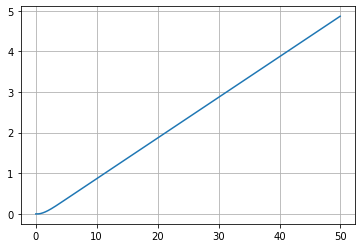

In [54]:
#Parametros do robo
u=0.1
w=0.0
R2=0.035
L2=0.28

#Parametros do motor
Ke = Kt = 0.01
J = 0.01
b = 0.019
R = 1
L = 0.5

Kp_E = 1
Ki_E = 1.5
Kd_E = 0.3

Kp_D = 1
Ki_D = 1.5
Kd_D = 0.3

i_E = np.zeros(np.size(t))
i_p_E = np.zeros(np.size(t))
theta_p_E = np.zeros(np.size(t))
theta_pp_E = np.zeros(np.size(t))
i_D = np.zeros(np.size(t))
i_p_D = np.zeros(np.size(t))
theta_p_D = np.zeros(np.size(t))
theta_pp_D = np.zeros(np.size(t))

u_E = np.zeros(np.size(t))
u_D = np.zeros(np.size(t))

erro_E = 0
erro_old_E = 0
erro_i_E = 0
erro_d_E = 0
erro_D = 0
erro_old_D = 0
erro_i_D = 0
erro_d_D = 0

phi_p = np.zeros(np.size(t))
phi = np.zeros(np.size(t))
x_p = np.zeros(np.size(t))
x = np.zeros(np.size(t))

u = 0.1

we = ((2*u - w*L2)/(2*R2))*np.ones(np.size(t))
wd = ((2*u + w*L2)/(2*R2))*np.ones(np.size(t))

for k in range(0, np.size(t)-1):
    #ESQUERDO

    theta_pp_E[k+1] = (1/J) * (Kt*i_E[k] - b*theta_p_E[k])
    theta_p_E[k+1]  = theta_p_E[k] + theta_pp_E[k]*dt
    #ação de controle u[k] aplicada como a tensão V para
    #estabilizar a velocidade no setpoint
    i_p_E[k+1]      = (1/L)*(u_E[k] - R*i_E[k] - Ke*theta_p_E[k])
    i_E[k+1]        = i_E[k] + i_p_E[k]*dt

    erro_E = we[k] - theta_p_E[k]
    erro_d_E = (erro_E - erro_old_E)/dt
    erro_i_E = erro_i_E + erro_E*dt
    erro_old_E = erro_E

    u_E[k+1] = Kp_E*erro_E + Ki_E*erro_i_E + Kd_E*erro_d_E

    #DIREITO

    theta_pp_D[k+1] = (1/J) * (Kt*i_D[k] - b*theta_p_D[k])
    theta_p_D[k+1]  = theta_p_D[k] + theta_pp_D[k]*dt
    #ação de controle u[k] aplicada como a tensão V para
    #estabilizar a velocidade no setpoint
    i_p_D[k+1]      = (1/L)*(u_D[k] - R*i_D[k] - Ke*theta_p_D[k])
    i_D[k+1]        = i_D[k] + i_p_D[k]*dt

    erro_D = wd[k] - theta_p_D[k]
    erro_d_D = (erro_D - erro_old_D)/dt
    erro_i_D = erro_i_D + erro_D*dt
    erro_old_D = erro_D

    u_D[k+1] = Kp_D*erro_D + Ki_D*erro_i_D + Kd_D*erro_d_D

    phi_p[k+1] = (R2/L2)*(theta_p_D[k] - theta_p_E[k])
    x_p[k+1] = (R2/2)*(theta_p_D[k] + theta_p_E[k])*np.cos(phi[k])
    
    phi[k+1] = phi[k] + phi_p[k]*dt
    x[k+1] = x[k] + x_p[k]*dt

plt.plot(t, x)
plt.grid()

print("A coordenada x será dependente do tempo, em t = 100s x(t) -> x(100) = %.2f" % (x[100]))

### Pergunta

O método de realimentação comum define os valores considerando que o robô conseguirá assumir as velocidades estipuladas instantaneamente, fato que não acontece. 

Quando utilizamos a realimentação com odometria os valores demoram mais para serem fisicamente definidos no robô e, por consequência, o movimento demora um pouco mais para acontecer seguindo os parâmetros de velocidade que são desejados.

## **Questão 4**

### [ a ]
É possível atingir u = 0.1 m/s e $\omega$ = 0.1 rad/s?

(0.0, 10.0)

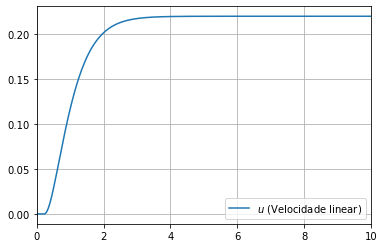

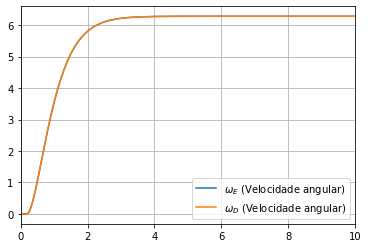

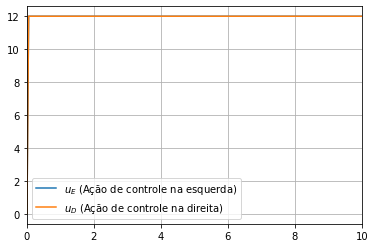

In [55]:
#Parametros do robo
u=0.1
w=0.0
R2=0.035
L2=0.28

#Parametros do motor
Ke = Kt = 0.01
J = 0.01
b = 0.019
R = 1
L = 0.5

Kp_E = 1
Ki_E = 1.5
Kd_E = 0.3

Kp_D = 1
Ki_D = 1.5
Kd_D = 0.3

i_E = np.zeros(np.size(t))
i_p_E = np.zeros(np.size(t))
theta_p_E = np.zeros(np.size(t))
theta_pp_E = np.zeros(np.size(t))
i_D = np.zeros(np.size(t))
i_p_D = np.zeros(np.size(t))
theta_p_D = np.zeros(np.size(t))
theta_pp_D = np.zeros(np.size(t))

u_E = np.zeros(np.size(t))
u_D = np.zeros(np.size(t))
u_max = 12

erro_E = 0
erro_old_E = 0
erro_i_E = 0
erro_d_E = 0
erro_D = 0
erro_old_D = 0
erro_i_D = 0
erro_d_D = 0

phi_p = np.zeros(np.size(t))
phi = np.zeros(np.size(t))
x_p = np.zeros(np.size(t))
x = np.zeros(np.size(t))

u = 0.5

we = ((2*u - w*L2)/(2*R2))*np.ones(np.size(t))
wd = ((2*u + w*L2)/(2*R2))*np.ones(np.size(t))

for k in range(0, np.size(t)-1):
    #ESQUERDO

    theta_pp_E[k+1] = (1/J) * (Kt*i_E[k] - b*theta_p_E[k])
    theta_p_E[k+1]  = theta_p_E[k] + theta_pp_E[k]*dt
    #ação de controle u[k] aplicada como a tensão V para
    #estabilizar a velocidade no setpoint
    i_p_E[k+1]      = (1/L)*(u_E[k] - R*i_E[k] - Ke*theta_p_E[k])
    i_E[k+1]        = i_E[k] + i_p_E[k]*dt

    erro_E = we[k] - theta_p_E[k]
    erro_d_E = (erro_E - erro_old_E)/dt
    erro_i_E = erro_i_E + erro_E*dt
    erro_old_E = erro_E

    u_E[k+1] = Kp_E*erro_E + Ki_E*erro_i_E + Kd_E*erro_d_E
    if abs(u_E[k+1])>12:
        if u_E[k+1]>0:
            u_E[k+1] = u_max
        else:
            u_E[k+1] = -u_max

    #DIREITO

    theta_pp_D[k+1] = (1/J) * (Kt*i_D[k] - b*theta_p_D[k])
    theta_p_D[k+1]  = theta_p_D[k] + theta_pp_D[k]*dt
    #ação de controle u[k] aplicada como a tensão V para
    #estabilizar a velocidade no setpoint
    i_p_D[k+1]      = (1/L)*(u_D[k] - R*i_D[k] - Ke*theta_p_D[k])
    i_D[k+1]        = i_D[k] + i_p_D[k]*dt

    erro_D = wd[k] - theta_p_D[k]
    erro_d_D = (erro_D - erro_old_D)/dt
    erro_i_D = erro_i_D + erro_D*dt
    erro_old_D = erro_D

    u_D[k+1] = Kp_D*erro_D + Ki_D*erro_i_D + Kd_D*erro_d_D
    if abs(u_D[k+1])>12:
        if u_D[k+1]>0:
            u_D[k+1] = u_max
        else:
            u_D[k+1] = -u_max

    phi_p[k+1] = (R2/L2)*(theta_p_D[k] - theta_p_E[k])
    x_p[k+1] = (R2/2)*(theta_p_D[k] + theta_p_E[k])*np.cos(phi[k])
    
    phi[k+1] = phi[k] + phi_p[k]*dt
    x[k+1] = x[k] + x_p[k]*dt

plt.figure(1)
plt.plot(t, x_p, label='$u$ (Velocidade linear)')
plt.legend()
plt.grid()
plt.xlim([0, 10])

plt.figure(2)
plt.plot(t, theta_p_E, label='$\omega_E$ (Velocidade angular)')
plt.plot(t, theta_p_D, label='$\omega_D$ (Velocidade angular)')
plt.legend()
plt.grid()
plt.xlim([0, 10])

plt.figure(3)
plt.plot(t, u_E, label='$u_E$ (Ação de controle na esquerda)')
plt.plot(t, u_D, label='$u_D$ (Ação de controle na direita)')
plt.grid()
plt.legend()
plt.xlim([0, 10])

In [56]:
#Fixando os valores de U e W:

u = 0.1
w = 0.1
R2 = 0.035
L2 = 0.28

wd_mean = (2*u + w*L2)/(2*R2)
we_mean = (2*u - w*L2)/(2*R2)

print("Velocidade da ESQUERDA: %.2f rad/s \nVelocidade da DIREITA:  %.2f rad/s" %(we_mean, wd_mean))

Velocidade da ESQUERDA: 2.46 rad/s 
Velocidade da DIREITA:  3.26 rad/s


#### Resposta

Sim, é possível exigir $u = 0.1$ e $\omega = 0.1$ pois as velocidades são inferiores a $2\pi$ rad/s.

### [ b ]
É possível atingir u = 0.2 m/s e $\omega$ = 0.2 rad/s?

In [57]:
#Fixando os valores de U e W:

u = 0.2
w = 0.2
R2 = 0.035
L2 = 0.28

wd_mean = (2*u + w*L2)/(2*R2)
we_mean = (2*u - w*L2)/(2*R2)

print("Velocidade da ESQUERDA: %.2f rad/s \nVelocidade da DIREITA:  %.2f rad/s" %(we_mean, wd_mean))

Velocidade da ESQUERDA: 4.91 rad/s 
Velocidade da DIREITA:  6.51 rad/s


#### Resposta

Não é possível exigir $u = 0.2$ e $\omega = 0.2$ pois isso exigiria uma velocidade de 6.51 rad/s da roda esquerda, que supera o limite de 6.28 ($2\pi$) rad/s.

### [ b ]
Fixando $u = 0.1$, qual a velocidade máxima $\omega$ que pode ser exigida?

In [58]:
R2 = 0.035
L2 = 0.28
u = 0.1
wd_mean = 2*np.pi

w_max = (wd_mean*(2*R2)-2*u)/L2

print("A velocidade máxima que pode ser exigida fixando-se u = 0.1 é: %.2f rad/s." % (w_max))

A velocidade máxima que pode ser exigida fixando-se u = 0.1 é: 0.86 rad/s.


#### Resposta
A velocidade máxima que pode ser exigida fixando-se $u = 0.1$ é $\omega = 0.86$ rad/s.

## **Questão 5**

Determinar a pose $p = [\,\, x, \,\, y, \,\, \phi, \,\, ]^T$

### [ a ]
Obter a pose pela integração do modelo do uniciclo.

Notar como $p_r = [\,\, x_r, \,\, y_r, \,\, \phi_r, \,\, ]^T$ e $p_o = [\,\, x_o, \,\, y_o, \,\, \phi_o, \,\, ]^T$

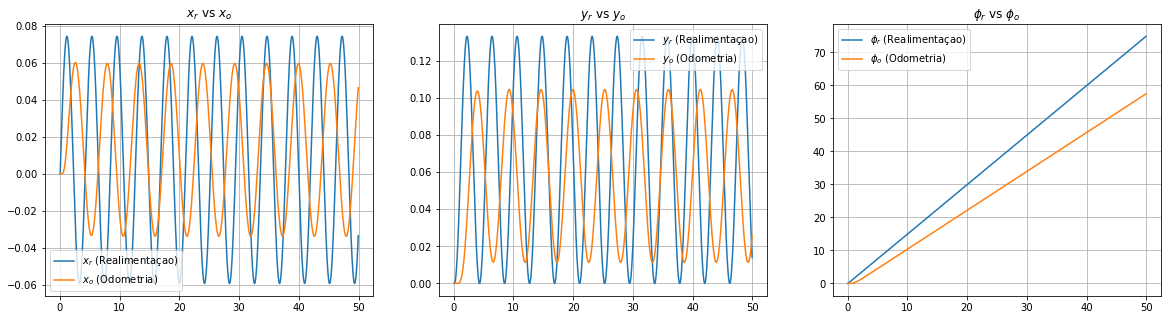

In [59]:
#Parametros do robo
u = 0.1
w = 1.5
R2 = 0.035
L2 = 0.28

#Parametros do motor
Ke = Kt = 0.01
J = 0.01
b = 0.019
R = 1
L = 0.5

Kp_E = 1
Ki_E = 1.5
Kd_E = 0.3

Kp_D = 1
Ki_D = 1.5
Kd_D = 0.3

i_E = np.zeros(np.size(t))
i_p_E = np.zeros(np.size(t))
theta_p_E = np.zeros(np.size(t))
theta_pp_E = np.zeros(np.size(t))
i_D = np.zeros(np.size(t))
i_p_D = np.zeros(np.size(t))
theta_p_D = np.zeros(np.size(t))
theta_pp_D = np.zeros(np.size(t))

u_E = np.zeros(np.size(t))
u_D = np.zeros(np.size(t))
u_max = 12

erro_E = 0
erro_old_E = 0
erro_i_E = 0
erro_d_E = 0
erro_D = 0
erro_old_D = 0
erro_i_D = 0
erro_d_D = 0

#DERIVADAS
#REALIMENTAÇAO
x_p_r = np.zeros(np.size(t))
y_p_r = np.zeros(np.size(t))
phi_p_r = np.zeros(np.size(t))
#ODOMETRIA
x_p_o = np.zeros(np.size(t))
y_p_o = np.zeros(np.size(t))
phi_p_o = np.zeros(np.size(t))

#INTEGRADOS
#REALIMENTAÇAO
x_r = np.zeros(np.size(t))
y_r = np.zeros(np.size(t))
phi_r = np.zeros(np.size(t))
#ODOMETRIA
x_o = np.zeros(np.size(t))
y_o = np.zeros(np.size(t))
phi_o = np.zeros(np.size(t))

we = ((2*u - w*L2)/(2*R2))*np.ones(np.size(t))
wd = ((2*u + w*L2)/(2*R2))*np.ones(np.size(t))

for k in range(0, np.size(t)-1):
    #ESQUERDO

    theta_pp_E[k+1] = (1/J) * (Kt*i_E[k] - b*theta_p_E[k])
    theta_p_E[k+1]  = theta_p_E[k] + theta_pp_E[k]*dt
    #ação de controle u[k] aplicada como a tensão V para
    #estabilizar a velocidade no setpoint
    i_p_E[k+1]      = (1/L)*(u_E[k] - R*i_E[k] - Ke*theta_p_E[k])
    i_E[k+1]        = i_E[k] + i_p_E[k]*dt

    erro_E = we[k] - theta_p_E[k]
    erro_d_E = (erro_E - erro_old_E)/dt
    erro_i_E = erro_i_E + erro_E*dt
    erro_old_E = erro_E

    u_E[k+1] = Kp_E*erro_E + Ki_E*erro_i_E + Kd_E*erro_d_E
    if abs(u_E[k+1])>12:
        if u_E[k+1]>0:
            u_E[k+1] = u_max
        else:
            u_E[k+1] = -u_max

    #DIREITO

    theta_pp_D[k+1] = (1/J) * (Kt*i_D[k] - b*theta_p_D[k])
    theta_p_D[k+1]  = theta_p_D[k] + theta_pp_D[k]*dt
    #ação de controle u[k] aplicada como a tensão V para
    #estabilizar a velocidade no setpoint
    i_p_D[k+1]      = (1/L)*(u_D[k] - R*i_D[k] - Ke*theta_p_D[k])
    i_D[k+1]        = i_D[k] + i_p_D[k]*dt

    erro_D = wd[k] - theta_p_D[k]
    erro_d_D = (erro_D - erro_old_D)/dt
    erro_i_D = erro_i_D + erro_D*dt
    erro_old_D = erro_D

    u_D[k+1] = Kp_D*erro_D + Ki_D*erro_i_D + Kd_D*erro_d_D
    if abs(u_D[k+1])>12:
        if u_D[k+1]>0:
            u_D[k+1] = u_max
        else:
            u_D[k+1] = -u_max

    #REALIMENTAÇAO
    phi_p_r[k+1] = w
    x_p_r[k+1] = u*(np.cos(phi_r[k]))
    y_p_r[k+1] = u*(np.sin(phi_r[k]))

    phi_r[k+1] = phi_r[k] + phi_p_r[k]*dt
    x_r[k+1] = x_r[k] + x_p_r[k]*dt
    y_r[k+1] = y_r[k] + y_p_r[k]*dt

    #ODOMETRIA 
    phi_p_o[k+1] = (R2/L2)*(theta_p_D[k] - theta_p_E[k])
    x_p_o[k+1] = (R2/2)*(theta_p_D[k] + theta_p_E[k])*np.cos(phi_o[k])
    y_p_o[k+1] = (R2/2)*(theta_p_D[k] + theta_p_E[k])*np.sin(phi_o[k])
    
    phi_o[k+1] = phi_o[k] + phi_p_o[k]*dt
    x_o[k+1] = x_o[k] + x_p_o[k]*dt
    y_o[k+1] = y_o[k] + y_p_o[k]*dt

plt.figure(1, figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(t, x_r, label='$x_r$ (Realimentaçao)')
plt.plot(t, x_o, label='$x_o$ (Odometria)')
plt.title("$x_r$ vs $x_o$")
plt.legend()
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(t, y_r, label='$y_r$ (Realimentaçao)')
plt.plot(t, y_o, label='$y_o$ (Odometria)')
plt.title("$y_r$ vs $y_o$")
plt.legend()
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(t, phi_r, label='$\phi_r$ (Realimentaçao)')
plt.plot(t, phi_o, label='$\phi_o$ (Odometria)')
plt.title("$\phi_r$ vs $\phi_o$")
plt.legend()
plt.grid()

### Respostas

#### [ i ]
Qual a divergência nos dois sinais?

Enquanto o sistema com a realimentação consegue realizar a força instantaneamente, o outro com a implementação por odometria contém u atraso (justificável) que causa uma defasagem nos sinais.

#### [ ii ]
De que depende o desempenho do resultado por odometria?

De informações referentes à modelagem do sistema (distância entre as rodas, tamanho das rodas) e a precisão do encoder que está sendo utilizado para obter as velocidades e acelerações das rodas.

## **Questão 6**

Implementação com Goal to Goal.

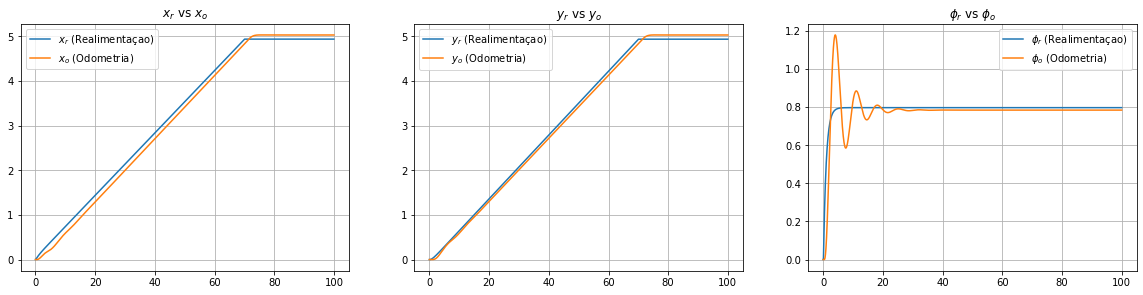

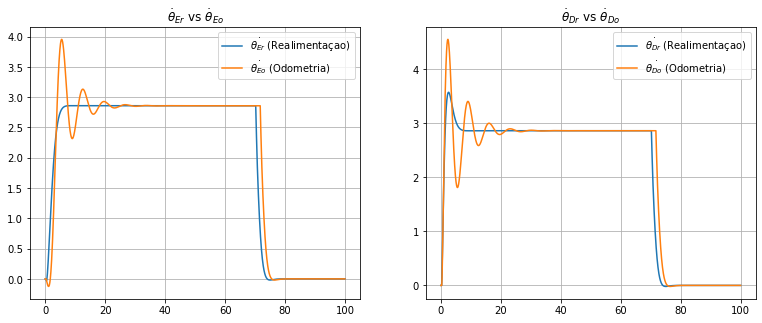

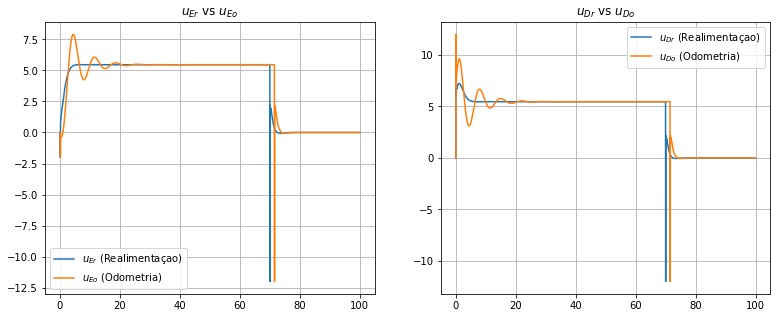

In [109]:
tolerancia_o = 0.1
tolerancia_r = 0.1
rho_o = 0
rho_r = 0
u0 = 0.1
Kp_g = 1
xg, yg = (5, 5)

# x, y, phi = (0, 0, 0)
tf = 100
t = np.arange(0, tf, dt)

we_o = np.zeros(np.size(t))
wd_o = np.zeros(np.size(t))
we_r = np.zeros(np.size(t))
wd_r = np.zeros(np.size(t))

# Controlar_Motores_Uniciclo(u,w) #Movimento de exemplo

#Parametros do robo
u = 0.0
w = 0.0
R2 = 0.035
L2 = 0.28

#Parametros do motor
Ke = Kt = 0.01
J = 0.01
b = 0.019
R = 1
L = 0.5

Kp_E = 1
Ki_E = 1.5
Kd_E = 0.3

Kp_D = 1
Ki_D = 1.5
Kd_D = 0.3

i_E = np.zeros(np.size(t))
i_p_E = np.zeros(np.size(t))
theta_p_E = np.zeros(np.size(t))
theta_pp_E = np.zeros(np.size(t))
i_D = np.zeros(np.size(t))
i_p_D = np.zeros(np.size(t))
theta_p_D = np.zeros(np.size(t))
theta_pp_D = np.zeros(np.size(t))

u_E = np.zeros(np.size(t))
u_D = np.zeros(np.size(t))
u_max = 12

erro_E = 0
erro_old_E = 0
erro_i_E = 0
erro_d_E = 0
erro_D = 0
erro_old_D = 0
erro_i_D = 0
erro_d_D = 0

#DERIVADAS
#REALIMENTAÇAO
x_p_r = np.zeros(np.size(t))
y_p_r = np.zeros(np.size(t))
phi_p_r = np.zeros(np.size(t))
#ODOMETRIA
x_p_o = np.zeros(np.size(t))
y_p_o = np.zeros(np.size(t))
phi_p_o = np.zeros(np.size(t))

#INTEGRADOS
#REALIMENTAÇAO
x_r = np.zeros(np.size(t))
y_r = np.zeros(np.size(t))
phi_r = np.zeros(np.size(t))
#ODOMETRIA
x_o = np.zeros(np.size(t))
y_o = np.zeros(np.size(t))
phi_o = np.zeros(np.size(t))

#ARMAZENADOR DAS VELOCIDADES
theta_p_E_o = np.zeros(np.size(t))
theta_p_D_o = np.zeros(np.size(t))
u_E_o = np.zeros(np.size(t))
u_D_o = np.zeros(np.size(t))

theta_p_E_r = np.zeros(np.size(t))
theta_p_D_r = np.zeros(np.size(t))
u_E_r = np.zeros(np.size(t))
u_D_r = np.zeros(np.size(t))

#ODOMETRIA
for k in range(0, np.size(t)-1):
    #ESQUERDO

    #orientação phi (heading) até o ponto desejado
    phid_o = np.arctan2(yg-y_o[k],xg-x_o[k])
    #toma o erro com relacao a orientacao atual
    e_o = phid_o - phi_o[k]
    #normaliza em 360 (ou 2pi)
    e_o = np.arctan2(np.sin(e_o), np.cos(e_o))
    #rho calcula a distancia ate o ponto desejado
    rho_o = np.sqrt((xg-x_o[k])**2 + (yg-y_o[k])**2)

    #testar se rho<l, se sim, zera tudo e para de mover.
    if rho_o < tolerancia_o :
        chave = False #chave falsa, zera tudo (u e w).
        #count+=1
    else:
        chave=True

    if chave == True:
        u = u0
        w = Kp_g * e_o
    else:
        u = 0.0
        w = 0.0

    we_o[k+1] = ((2*u - w*L2)/(2*R2))
    wd_o[k+1] = ((2*u + w*L2)/(2*R2))

    theta_pp_E[k+1] = (1/J) * (Kt*i_E[k] - b*theta_p_E[k])
    theta_p_E[k+1]  = theta_p_E[k] + theta_pp_E[k]*dt

    #ação de controle u[k] aplicada como a tensão V para
    #estabilizar a velocidade no setpoint
    i_p_E[k+1]      = (1/L)*(u_E[k] - R*i_E[k] - Ke*theta_p_E[k])
    i_E[k+1]        = i_E[k] + i_p_E[k]*dt

    erro_E = we_o[k] - theta_p_E[k]
    erro_d_E = (erro_E - erro_old_E)/dt
    erro_i_E = erro_i_E + erro_E*dt
    erro_old_E = erro_E

    u_E[k+1] = Kp_E*erro_E + Ki_E*erro_i_E + Kd_E*erro_d_E

    if abs(u_E[k+1])>12:
        if u_E[k+1]>0:
            u_E[k+1] = u_max
        else:
            u_E[k+1] = -u_max

    #DIREITO

    theta_pp_D[k+1] = (1/J) * (Kt*i_D[k] - b*theta_p_D[k])
    theta_p_D[k+1]  = theta_p_D[k] + theta_pp_D[k]*dt
    #ação de controle u[k] aplicada como a tensão V para
    #estabilizar a velocidade no setpoint
    i_p_D[k+1]      = (1/L)*(u_D[k] - R*i_D[k] - Ke*theta_p_D[k])
    i_D[k+1]        = i_D[k] + i_p_D[k]*dt

    erro_D = wd_o[k] - theta_p_D[k]
    erro_d_D = (erro_D - erro_old_D)/dt
    erro_i_D = erro_i_D + erro_D*dt
    erro_old_D = erro_D

    u_D[k+1] = Kp_D*erro_D + Ki_D*erro_i_D + Kd_D*erro_d_D
    if abs(u_D[k+1])>12:
        if u_D[k+1]>0:
            u_D[k+1] = u_max
        else:
            u_D[k+1] = -u_max

    theta_p_E_o[k+1] = theta_p_E[k]
    theta_p_D_o[k+1] = theta_p_D[k]
    u_E_o[k+1] = u_E[k]
    u_D_o[k+1] = u_D[k]

    #ODOMETRIA 
    phi_p_o[k+1] = (R2/L2)*(theta_p_D[k] - theta_p_E[k])
    x_p_o[k+1] = (R2/2)*(theta_p_D[k] + theta_p_E[k])*np.cos(phi_o[k])
    y_p_o[k+1] = (R2/2)*(theta_p_D[k] + theta_p_E[k])*np.sin(phi_o[k])
    
    phi_o[k+1] = phi_o[k] + phi_p_o[k]*dt
    x_o[k+1] = x_o[k] + x_p_o[k]*dt
    y_o[k+1] = y_o[k] + y_p_o[k]*dt



#REALIMENTACAO
for k in range(0, np.size(t)-1):
    #ESQUERDO

    #orientação phi (heading) até o ponto desejado
    phid_r = np.arctan2(yg-y_r[k],xg-x_r[k])
    #toma o erro com relacao a orientacao atual
    e_r = phid_r - phi_r[k]
    #normaliza em 360 (ou 2pi)
    e_r = np.arctan2(np.sin(e_r), np.cos(e_r))
    #rho calcula a distancia ate o ponto desejado
    rho_r = np.sqrt((xg-x_r[k])**2 + (yg-y_r[k])**2)

    #testar se rho<l, se sim, zera tudo e para de mover.
    if rho_r< tolerancia_r :
        chave = False #chave falsa, zera tudo (u e w).
        #count+=1
    else:
        chave=True

    if chave == True:
        u = u0
        w = Kp_g * e_r
    else:
        u = 0.0
        w = 0.0

    we_r[k+1] = ((2*u - w*L2)/(2*R2))
    wd_r[k+1] = ((2*u + w*L2)/(2*R2))

    theta_pp_E[k+1] = (1/J) * (Kt*i_E[k] - b*theta_p_E[k])
    theta_p_E[k+1]  = theta_p_E[k] + theta_pp_E[k]*dt
    #ação de controle u[k] aplicada como a tensão V para
    #estabilizar a velocidade no setpoint
    i_p_E[k+1]      = (1/L)*(u_E[k] - R*i_E[k] - Ke*theta_p_E[k])
    i_E[k+1]        = i_E[k] + i_p_E[k]*dt

    erro_E = we_r[k] - theta_p_E[k]
    erro_d_E = (erro_E - erro_old_E)/dt
    erro_i_E = erro_i_E + erro_E*dt
    erro_old_E = erro_E

    u_E[k+1] = Kp_E*erro_E + Ki_E*erro_i_E + Kd_E*erro_d_E

    if abs(u_E[k+1])>12:
        if u_E[k+1]>0:
            u_E[k+1] = u_max
        else:
            u_E[k+1] = -u_max

    #DIREITO

    theta_pp_D[k+1] = (1/J) * (Kt*i_D[k] - b*theta_p_D[k])
    theta_p_D[k+1]  = theta_p_D[k] + theta_pp_D[k]*dt
    #ação de controle u[k] aplicada como a tensão V para
    #estabilizar a velocidade no setpoint
    i_p_D[k+1]      = (1/L)*(u_D[k] - R*i_D[k] - Ke*theta_p_D[k])
    i_D[k+1]        = i_D[k] + i_p_D[k]*dt

    erro_D = wd_r[k] - theta_p_D[k]
    erro_d_D = (erro_D - erro_old_D)/dt
    erro_i_D = erro_i_D + erro_D*dt
    erro_old_D = erro_D

    u_D[k+1] = Kp_D*erro_D + Ki_D*erro_i_D + Kd_D*erro_d_D
    if abs(u_D[k+1])>12:
        if u_D[k+1]>0:
            u_D[k+1] = u_max
        else:
            u_D[k+1] = -u_max

    theta_p_E_r[k+1] = theta_p_E[k]
    theta_p_D_r[k+1] = theta_p_D[k]
    u_E_r[k+1] = u_E[k]
    u_D_r[k+1] = u_D[k]

    #REALIMENTAÇAO
    phi_p_r[k+1] = w
    x_p_r[k+1] = u*(np.cos(phi_r[k]))
    y_p_r[k+1] = u*(np.sin(phi_r[k]))

    phi_r[k+1] = phi_r[k] + phi_p_r[k]*dt
    x_r[k+1] = x_r[k] + x_p_r[k]*dt
    y_r[k+1] = y_r[k] + y_p_r[k]*dt

u_E_r = u_E
u_D_r = u_D
theta_p_E_r = theta_p_E
theta_p_D_r = theta_p_D

plt.figure(1, figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.plot(t, x_r, label='$x_r$ (Realimentaçao)')
plt.plot(t, x_o, label='$x_o$ (Odometria)')
plt.title("$x_r$ vs $x_o$")
plt.legend()
plt.grid()

plt.subplot(2, 3, 2)
plt.plot(t, y_r, label='$y_r$ (Realimentaçao)')
plt.plot(t, y_o, label='$y_o$ (Odometria)')
plt.title("$y_r$ vs $y_o$")
plt.legend()
plt.grid()

plt.subplot(2, 3, 3)
plt.plot(t, phi_r, label='$\phi_r$ (Realimentaçao)')
plt.plot(t, phi_o, label='$\phi_o$ (Odometria)')
plt.title("$\phi_r$ vs $\phi_o$")
plt.legend()
plt.grid()


plt.figure(2, figsize=(13, 5))

plt.subplot(1, 2, 1)
plt.plot(t, theta_p_E_r, label='$\dot{\\theta_{Er}}$ (Realimentaçao)')
plt.plot(t, theta_p_E_o, label='$\dot{\\theta_{Eo}}$ (Odometria)')
plt.title("$\dot{\\theta}_{Er}$ vs $\dot{\\theta}_{Eo}$")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(t, theta_p_D_r, label='$\dot{\\theta_{Dr}}$ (Realimentaçao)')
plt.plot(t, theta_p_D_o, label='$\dot{\\theta_{Do}}$ (Odometria)')
plt.title("$\dot{\\theta}_{Dr}$ vs $\dot{\\theta}_{Do}$")
plt.legend()
plt.grid()

plt.figure(3, figsize=(13, 5))

plt.subplot(1, 2, 1)
plt.plot(t, u_E_r, label='$u_{Er}$ (Realimentaçao)')
plt.plot(t, u_E_o, label='$u_{Eo}$ (Odometria)')
plt.title("$u_{Er}$ vs $u_{Eo}$")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(t, u_D_r, label='$u_{Dr}$ (Realimentaçao)')
plt.plot(t, u_D_o, label='$u_{Do}$ (Odometria)')
plt.title("$u_{Dr}$ vs $u_{Do}$")
plt.legend()
plt.grid()